来自于UCI主页（<a>http://archive.ics.uci.edu/ml/datasets.html</a>）的数据集Knowledge.xlsx，该一共包含403个观测和6个变量，具体信息如下：

<img src="exercise1/image1.png" />

前5列分别为学生在目标学科上的学习时长（STG），重复次数（SCG），相关科目的学习时长（STR），相关科目的考试成绩（LPR）和目标科目的考试成绩（PEG），这些指标都已经做了归一化处理，最后一列是学生对知识掌握程度的高低分类（UNS），一共含有四种值，分别为Very Low， Low，Middle和High。

针对该数据，构建KNN分类模型，完成以下任务：

（1）学生在目标学科上的学习时长（STG）的最大值，最小值，均值和方差，并写入“STG特征量.csv“，格式如下：（5分）；
|最大值|最小值|均值|方差|
|---|---|---|---|

（2）使用kNN模型，根据数据长度length，设置待测试的不同k值，如：k=np.ceil(np.log2(length))，使用10重交叉验证，确定最佳的近邻k的值，并保存为“最佳k值.csv“文件中（5分）； 

（3）绘制不同K值与平均预测准确率之间的折线图，并保存为‘1.jpg’（5分）

In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_excel("exercise1/Knowledge.xlsx")
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,High
399,0.85,0.82,0.66,0.83,0.83,High
400,0.56,0.60,0.77,0.13,0.32,Low
401,0.66,0.68,0.81,0.57,0.57,Middle


#### (1)
学生在目标学科上的学习时长（STG）的最大值，最小值，均值和方差，并写入“STG特征量.csv“，格式如下：（5分）；
|最大值|最小值|均值|方差|
|---|---|---|---|

In [3]:
result = pd.DataFrame([[
    data["STG"].max(),
    data["STG"].min(),
    data["STG"].mean(),
    data["STG"].var()
]], columns = ["最大值", "最小值", "均值", "方差"])
result

,最大值,最小值,均值,方差
0,0.99,0.0,0.353141,0.044951


In [4]:
result.to_csv("exercise1/STG特征量.csv", index = False)

#### (2)
使用kNN模型，根据数据长度length，设置待测试的不同k值，如：k=np.ceil(np.log2(length))，使用10重交叉验证，确定最佳的近邻k的值，并保存为“最佳k值.csv“文件中（5分）； 

In [5]:
scores = []
k = np.ceil(np.log2(data.shape[0]))
k

np.float64(9.0)

In [6]:
len(data)

403

In [7]:
data.shape

(403, 6)

In [8]:
for kk in tqdm(range(int(k - 8), int(k + 10))):
    model = KNeighborsClassifier(n_neighbors = kk, n_jobs = -1)
    score = np.mean(cross_val_score(model, data.drop("UNS", axis = 1), data["UNS"], cv=10, n_jobs = -1))
    scores.append(score)
scores

100%|██████████| 18/18 [00:03<00:00,  5.20it/s]


[np.float64(0.821890243902439),
 np.float64(0.8337804878048782),
 np.float64(0.8615243902439025),
 np.float64(0.8560975609756097),
 np.float64(0.8664024390243903),
 np.float64(0.8560365853658537),
 np.float64(0.853780487804878),
 np.float64(0.8660365853658536),
 np.float64(0.8562195121951218),
 np.float64(0.8612195121951218),
 np.float64(0.8585975609756098),
 np.float64(0.8487195121951221),
 np.float64(0.8510975609756098),
 np.float64(0.8535975609756097),
 np.float64(0.8535975609756097),
 np.float64(0.843719512195122),
 np.float64(0.8339634146341461),
 np.float64(0.818841463414634)]

In [9]:
idx = scores.index(max(scores))
best_k = list(range(int(k - 8), int(k + 10)))[idx]
best_k

5

In [10]:
with open("exercise1/最佳k值.csv", "w") as f:
    f.write(str(best_k))

#### (3)
绘制不同K值与平均预测准确率之间的折线图，并保存为‘1.jpg’（5分）

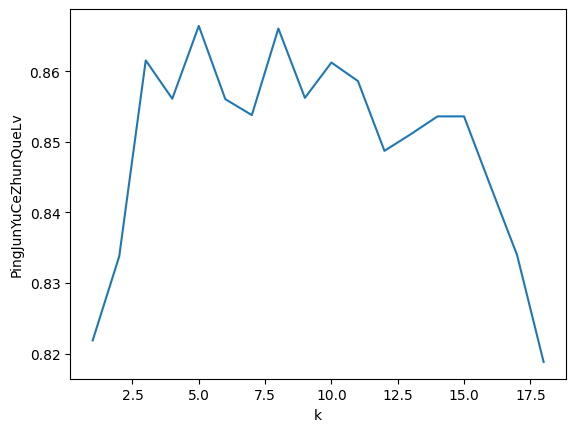

In [11]:
plt.show()
# plt.figure(1)
plt.plot(list(range(int(k - 8), int(k + 10))), scores)
plt.xlabel("k")
plt.ylabel("PingJunYuCeZhunQueLv")
plt.savefig("exercise1/1.jpg")
plt.show()